In [1]:
from __future__ import division

from sympy import *
from sympy.matrices import *

init_printing(use_unicode=True)

In [2]:
s11, s12, s21, s22 = symbols("s_{11} s_{12} s_{21} s_{22}", real=True)

In [3]:
def StoT(S):
    return 1/S[1,0]*Matrix([[-det(S), S[0,0]],[-S[1,1],1]])
    
def TtoS(T):
    return 1/T[1,1]*Matrix([[T[0,1], det(T)],[1,-T[1,0]]])    

In [4]:
S1 = Matrix([[s11,s12],[s21,s22]])
S1

Test S->T->S

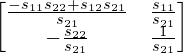

In [5]:
StoT(S1)

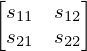

In [6]:
simplify(TtoS(StoT(S1)))

Секция S1->S2

In [7]:
s1_11, G = symbols("s_{11} G", real=True)
a1, L = symbols("a L", nonnegative=True)
gamma12, gamma21 = symbols("\\gamma_{12} \\gamma_{21}", complex=True)

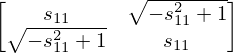

In [8]:
S1 = Matrix([[s1_11,sqrt(1-s1_11**2)],[sqrt(1-s1_11**2),s1_11]])
S1

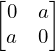

In [9]:
A1 = Matrix([[0,a1],[a1,0]])
A1

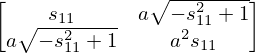

In [10]:
SA1 = simplify(TtoS(StoT(S1)*StoT(A1)))
SA1

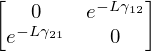

In [11]:
L = Matrix([[0,exp(-gamma12*L)],[exp(-gamma21*L),0]])
L

In [12]:
U2 = simplify(TtoS(StoT(SA1)*StoT(L)))[1,0]
U2

Ренормализация S параметров по следующей формуле [[1]](http://www.eecircle.com/downloads/SparViewer/SPEX20_guide.pdf):

$S=(S-\frac{Z'_0-Z_0}{Z'_0+Z_0}I)(I-\frac{Z'_0-Z_0}{Z'_0+Z_0}S)^{-1}$

In [13]:
S = simplify(TtoS(StoT(L)*StoT(SA1)))
S

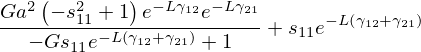

In [14]:
U1 = S[0,0]+S[0,1]*S[1,0]*G/(1-S[0,0]*G)
U1